In [1]:
#Importamos las librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as datetime
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [3]:
#Cargamos el csv
propiedades=pd.read_csv('train.csv')

In [4]:
#Verificamos si hay datos duplicados (no hay)
duplicated = propiedades.duplicated()
duplicated.value_counts()

False    240000
dtype: int64

In [5]:
propiedades.describe()
#No se observan valores minimos y maximos irreales

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
#Hacemos la conversión de fechas#Hacemos 
propiedades['Fecha']=pd.to_datetime(propiedades['fecha'])
propiedades.drop(columns={'fecha'},inplace=True)

In [6]:
#Generamos las columnas de Año, Mes y Dia
propiedades['Anio']=propiedades['Fecha'].dt.year
propiedades['Mes']=propiedades['Fecha'].dt.month
propiedades['Dia']=propiedades['Fecha'].dt.day

In [9]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 26 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
gimnasio                      240

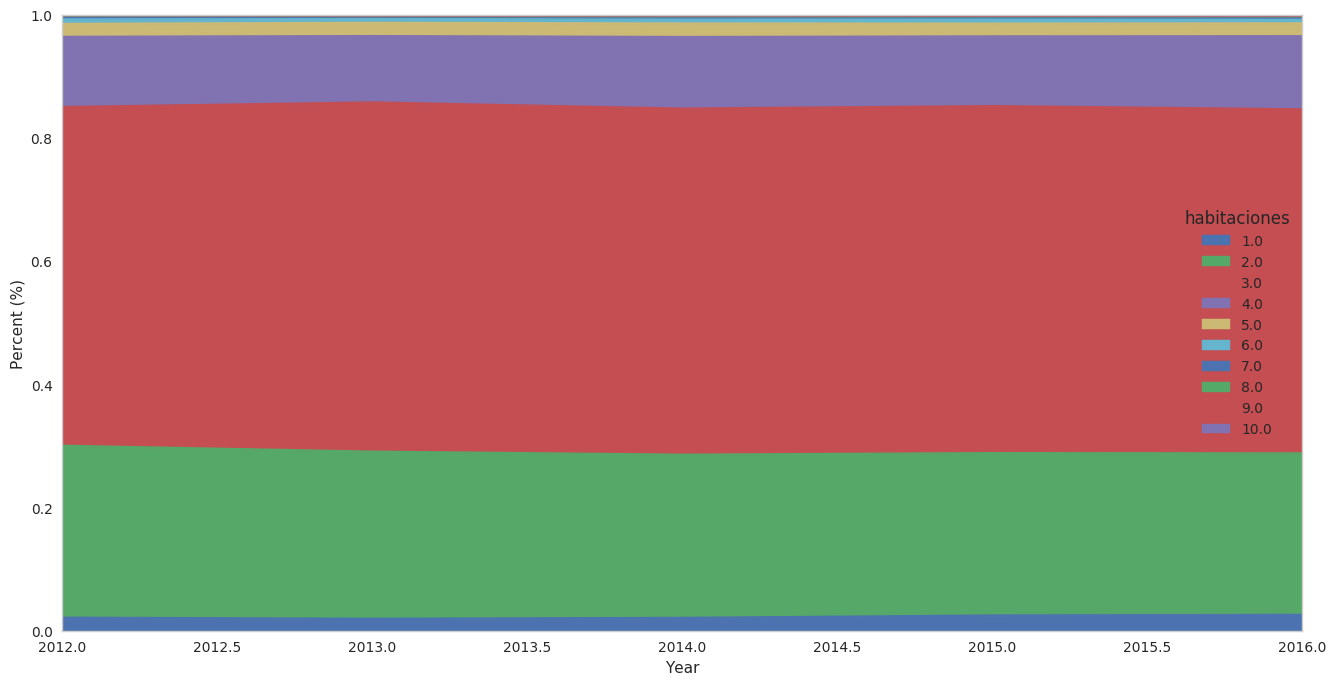

In [52]:
#Porcetaje de publicaciones a través del tiempo según el número de ambientes

gy = pd.DataFrame(propiedades.groupby(['habitaciones','Anio']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='habitaciones', index='Anio')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
ax=pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)

plt.show()

In [6]:
tipo_precio=propiedades[['tipodepropiedad','precio']].copy()
tipo_precio.dropna(subset=['tipodepropiedad'],inplace=True)

In [7]:
tipo_propiedad_top=tipo_precio['tipodepropiedad'].value_counts().head(10).reset_index()
tipo_propiedad_top.drop(columns={'tipodepropiedad'},inplace=True)
tipo_propiedad_top.rename(columns={'index':'tipodepropiedad'},inplace=True)
tipo_propiedad_top

,tipodepropiedad
0,Casa
1,Apartamento
2,Casa en condominio
3,Terreno
4,Local Comercial
5,Oficina comercial
6,Bodega comercial
7,Edificio
8,Terreno comercial
9,Casa uso de suelo


In [8]:
tipo_habitaciones=propiedades[['tipodepropiedad','habitaciones']].copy()
tipo_habitaciones_top=pd.merge(tipo_habitaciones,tipo_propiedad_top,on='tipodepropiedad',how='inner')
tipo_habitaciones_top.dropna(inplace=True)
tipo_habitaciones_top['habitaciones'].fillna(0,inplace=True)
group_tipo_habitaciones_top=tipo_habitaciones_top.groupby(['tipodepropiedad']).agg({'habitaciones':'median'})
group_tipo_habitaciones_top

,habitaciones
tipodepropiedad,
Apartamento,2.0
Bodega comercial,2.0
Casa,3.0
Casa en condominio,3.0
Casa uso de suelo,4.0
Edificio,6.0
Local Comercial,2.0
Oficina comercial,4.0
Terreno,3.0


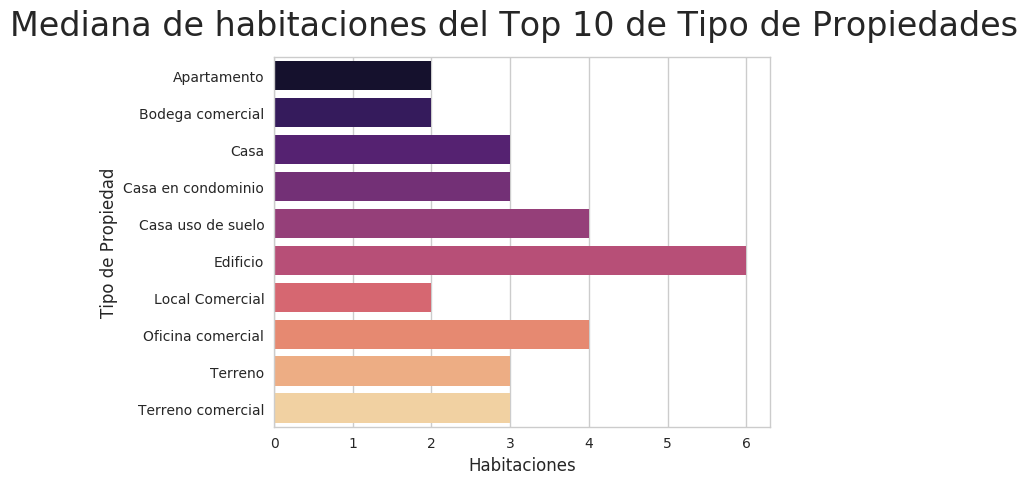

In [10]:
fig = plt.figure()
grafico_tipo_habitaciones_top=sns.barplot(x=group_tipo_habitaciones_top['habitaciones'],y=group_tipo_habitaciones_top.index,orient='h',palette='magma')
fig.suptitle('Mediana de habitaciones del Top 10 de Tipo de Propiedades', fontsize=24);
grafico_tipo_habitaciones_top.set_xlabel("Habitaciones",fontsize=12)
grafico_tipo_habitaciones_top.set_ylabel("Tipo de Propiedad",fontsize=12)

In [11]:
tipo_banos=propiedades[['tipodepropiedad','banos']].copy()
tipo_banos_top=pd.merge(tipo_banos,tipo_propiedad_top,on='tipodepropiedad',how='inner')
tipo_banos_top.dropna(inplace=True)
tipo_banos_top['banos'].fillna(0,inplace=True)
group_tipo_banos_top=tipo_banos_top.groupby(['tipodepropiedad']).agg({'banos':'median'})
group_tipo_banos_top

,banos
tipodepropiedad,
Apartamento,2.0
Bodega comercial,2.0
Casa,2.0
Casa en condominio,2.0
Casa uso de suelo,2.0
Edificio,3.0
Local Comercial,2.0
Oficina comercial,2.0
Terreno,1.0


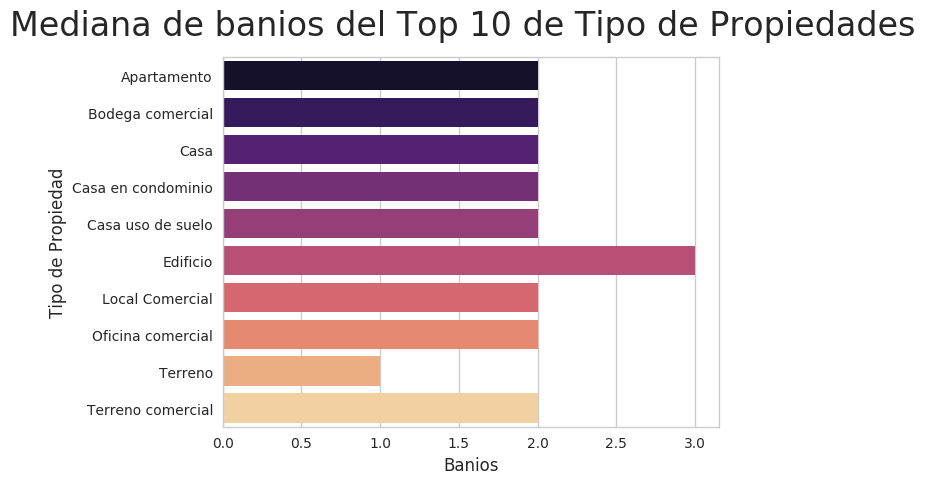

In [12]:
fig = plt.figure()
grafico_tipo_banos_top=sns.barplot(x=group_tipo_banos_top['banos'],y=group_tipo_banos_top.index,orient='h',palette='magma')
fig.suptitle('Mediana de banios del Top 10 de Tipo de Propiedades', fontsize=24);
grafico_tipo_banos_top.set_xlabel("Banios",fontsize=12)
grafico_tipo_banos_top.set_ylabel("Tipo de Propiedad",fontsize=12)

In [13]:
#Mediana de la antiguedad dependiendo si tiene centro comerciales cercanos

#centroscomerciales_antiguedad=propiedades[['centroscomercialescercanos','antiguedad']].copy()
#centroscomerciales_antiguedad.dropna(inplace=True)
#centroscomerciales_antiguedad['antiguedad'].fillna(0,inplace=True)
group_centroscomerciales_antiguedad=propiedades.groupby(['centroscomercialescercanos']).agg({'antiguedad':'median'})
group_centroscomerciales_antiguedad

#LO IBA A GRAFICAR PERO NO SE SI TIENE SENTIDO (pensé que podia haber una  diferencia pero parece que no)

,antiguedad
centroscomercialescercanos,
0.0,5.0
1.0,5.0


In [14]:
propiedades.agg({'antiguedad':'median'})

antiguedad    5.0
dtype: float64

In [17]:
group_escuelas_antiguedad=propiedades.groupby(['escuelascercanas']).agg({'antiguedad':'median'})
group_escuelas_antiguedad

,antiguedad
escuelascercanas,
0.0,5.0
1.0,5.0


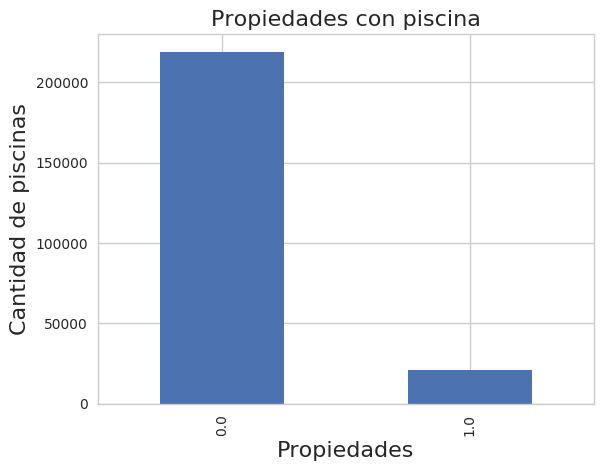

In [18]:
fig = plt.figure()

ax = propiedades['piscina'].value_counts().plot(kind='bar');

plt.title('Propiedades con piscina', fontsize=16)

ax.set_xlabel('Propiedades', fontsize= 16)
ax.set_ylabel('Cantidad de piscinas', fontsize= 16);

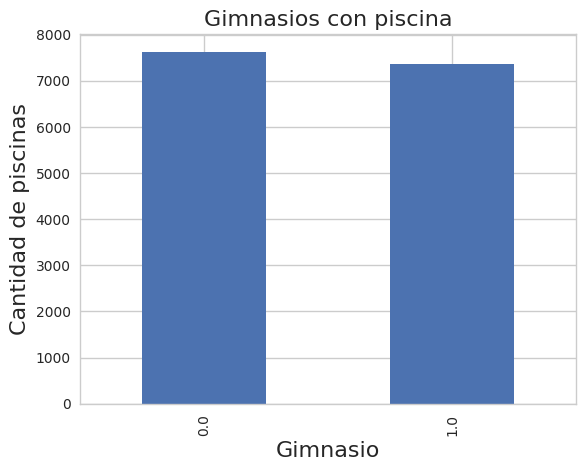

In [19]:
filtered = propiedades.loc[(propiedades.gimnasio==1.0)]

fig = plt.figure()

ax = filtered['piscina'].value_counts().plot(kind='bar');

plt.title('Gimnasios con piscina', fontsize=16)

ax.set_xlabel('Gimnasio', fontsize= 16)
ax.set_ylabel('Cantidad de piscinas', fontsize= 16);